In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import seaborn as sns
import random

random.seed(10)

In [5]:
input_dir = r"/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project/data"

In [6]:

df = pd.read_csv(os.path.join(input_dir,r"welfare_data_test.csv"))

In [8]:
df_chain = df[(df["Operation"]==2)|(df["Operation"]==1)]
df_chain_markets = df_chain.groupby("Chain")["Market"].nunique().reset_index().rename(columns={"Market":"num_markets"})

df_chain = df_chain.merge(df_chain_markets, on="Chain", how="left")

In [9]:
df_chain.groupby(["Market","num_markets"])["shareid"].nunique()

Market             num_markets
Chicago, IL        1               19
                   2               47
                   3               30
Houston, TX        1              112
                   2              113
                   3               75
Miami/Hialeah, FL  1                5
                   2               11
                   3               11
Name: shareid, dtype: int64

In [13]:
df_chain_markets.groupby("num_markets")["Chain"].nunique()

num_markets
1    57
2    33
3    10
Name: Chain, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73118 entries, 0 to 73117
Data columns (total 94 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              73118 non-null  int64  
 1   post_month                         73118 non-null  object 
 2   shareid                            73118 non-null  int64  
 3   year_month                         73118 non-null  object 
 4   Supply                             73118 non-null  float64
 5   Demand                             73118 non-null  float64
 6   Revenue                            73118 non-null  float64
 7   Occ                                73118 non-null  float64
 8   ADR                                73118 non-null  float64
 9   RevPAR                             73118 non-null  float64
 10  Country                            73118 non-null  object 
 11  Market                             73118 non-null  obj

In [33]:
df[df["is_reviewed"]!=0].groupby("Operation")[["Demand", "Supply","accum_rating","monthly_review_count"]].describe().to_csv(r"summary_stats_review.csv")

In [4]:
df[df["is_reviewed"]==True]["shareid"].nunique()

471

In [7]:
df["quality"].describe()

count    73118.000000
mean        -0.894699
std          1.767559
min         -5.014783
25%         -2.126830
50%         -1.235777
75%         -0.077289
max         24.046317
Name: quality, dtype: float64

In [8]:
list(df.columns)

['index',
 'post_month',
 'shareid',
 'year_month',
 'Supply',
 'Demand',
 'Revenue',
 'Occ',
 'ADR',
 'RevPAR',
 'Country',
 'Market',
 'Chain',
 'Owner',
 'Mgmt',
 'ParentCompany',
 'Operation',
 'Scale',
 'Class',
 'Location',
 'OpenDate',
 'SizeCode',
 'max_str_month',
 'max_review_month',
 'min_review_month',
 'on_ta',
 'monthly_rating_mean',
 'monthly_review_count',
 'monthly_one_star_count',
 'monthly_two_star_count',
 'monthly_three_star_count',
 'monthly_four_star_count',
 'monthly_five_star_count',
 'monthly_hotel_response_count',
 'monthly_partnership_reviews_count',
 'cleanliness_count',
 'cleanliness_mean',
 'location_count',
 'location_mean',
 'sleep_quality_count',
 'sleep_quality_mean',
 'room_quality_count',
 'room_quality_mean',
 'service_count',
 'service_mean',
 'value_count',
 'value_mean',
 'renovate',
 'solo_count',
 'couple_count',
 'family_count',
 'business_count',
 'month_with_reviews',
 'num_of_reviews',
 'total_one_star',
 'total_two_star',
 'total_three_st

In [207]:
df[df["Chain"]==0]["shareid"].nunique()

9

In [208]:
df[df["Owner"]==0]["shareid"].nunique()

327

In [209]:
df[df["Operation"]==3]["Chain"].unique()

array([1031.,    0.])

In [210]:
df[df["Operation"]==1]["Chain"].nunique()

56

In [211]:
df[df["Operation"]==3]["Chain"].nunique()-1

1

In [36]:
df.groupby("Chain")["shareid"].nunique().reset_index().sort_values(by="shareid",ascending=False).iloc[:20]

,Chain,shareid
49,1031.0,85
37,993.0,19
12,868.0,19
6,817.0,15
42,1005.0,14
43,1007.0,14
13,871.0,14
10,842.0,13
9,839.0,13
52,1098.0,13


In [35]:
df[df["Chain"]==0]

,index,post_month,shareid,year_month,Supply,Demand,Revenue,Occ,ADR,RevPAR,...,market_share,group_share,s_0,quality,Rating,ReviewCount_Reviewed,Rating_ReviewCount_Reviewed,operation,operation_year,ln_ADR
465,465,2014-10,82557,2014-10-01,930.0,70.0,19586.00,7.5268,279.800000,21.060215,...,0.000215,0.000674,0.429147,0.467604,0.000000,0.0,0.0,Independent,Independent_2014,5.634075
466,466,2014-11,82557,2014-11-01,900.0,193.0,48976.00,21.4444,253.761658,54.417778,...,0.000592,0.001792,0.408105,0.620247,0.000000,0.0,0.0,Independent,Independent_2014,5.536395
467,467,2014-12,82557,2014-12-01,930.0,434.0,206274.00,46.6666,475.285714,221.800000,...,0.001332,0.003826,0.384480,4.348828,4.000000,1.0,4.0,Independent,Independent_2014,6.163916
468,468,2015-01,82557,2015-01-01,900.0,327.0,117691.00,36.3333,359.911315,130.767778,...,0.001003,0.002616,0.316602,2.763116,4.000000,4.0,16.0,Independent,Independent_2015,5.885858
469,469,2015-02,82557,2015-02-01,840.0,583.0,208247.15,69.4047,357.199228,247.913274,...,0.001789,0.005025,0.358311,2.825419,4.111111,9.0,37.0,Independent,Independent_2015,5.878294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43512,35301,2017-02,7114502,2017-02-01,3332.0,2625.0,364116.91,78.7815,138.711204,109.278785,...,0.001849,0.007952,0.365105,-0.630565,3.675926,432.0,1588.0,Franchise,Franchise_2017,4.932394
43513,35302,2017-03,7114502,2017-03-01,3689.0,3097.0,316688.75,83.9522,102.256619,85.846774,...,0.002182,0.008373,0.298550,-0.829541,3.661400,443.0,1622.0,Franchise,Franchise_2017,4.627486
43514,35303,2017-04,7114502,2017-04-01,3570.0,2088.0,204555.16,58.4873,97.967031,57.298364,...,0.001471,0.006303,0.367117,-1.340553,3.649667,451.0,1646.0,Franchise,Franchise_2017,4.584631
43515,35304,2017-05,7114502,2017-05-01,3689.0,1514.0,151958.38,41.0409,100.368811,41.192296,...,0.001067,0.004459,0.357512,-1.413276,3.600432,463.0,1667.0,Franchise,Franchise_2017,4.608852


In [214]:
df[["Chain","Owner","Mgmt","ParentCompany"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73118 entries, 0 to 73117
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Chain          73118 non-null  float64
 1   Owner          73118 non-null  float64
 2   Mgmt           73118 non-null  float64
 3   ParentCompany  73118 non-null  float64
dtypes: float64(4)
memory usage: 2.2 MB


In [215]:
df.groupby("Chain")["shareid"].nunique().reset_index().sort_values(by="shareid",ascending=False).iloc[:20]

,Chain,shareid
49,1031.0,85
37,993.0,19
12,868.0,19
6,817.0,15
42,1005.0,14
43,1007.0,14
13,871.0,14
10,842.0,13
9,839.0,13
52,1098.0,13


In [216]:
df.groupby("ParentCompany")["shareid"].nunique().reset_index().sort_values(by="shareid",ascending=False).iloc[:20]

,ParentCompany,shareid
24,4690.0,102
0,0.0,94
27,4696.0,74
31,5271.0,52
23,4687.0,37
25,4692.0,26
32,5366.0,19
3,579.0,18
8,1026.0,14
20,2168.0,13


In [217]:
df.groupby("Chain")["Operation"].nunique().reset_index().describe()

,Chain,Operation
count,102.000000,102.000000
mean,3372.774510,1.215686
std,7419.862734,0.413329
min,0.000000,1.000000
25%,931.500000,1.000000
50%,1038.500000,1.000000
75%,3926.250000,1.000000
max,56772.000000,2.000000


In [218]:
df.groupby("Owner")["Operation"].nunique().reset_index().describe()

,Owner,Operation
count,81.000000,81.000000
mean,9747.283951,1.111111
std,22786.337464,0.387298
min,0.000000,1.000000
25%,2137.000000,1.000000
50%,3066.000000,1.000000
75%,5409.000000,1.000000
max,153465.000000,3.000000


In [219]:
df.groupby("Mgmt")["shareid"].nunique().reset_index().describe()

,Mgmt,shareid
count,108.000000,108.000000
mean,6683.305556,4.824074
std,16271.611056,26.555119
min,0.000000,1.000000
25%,1116.500000,1.000000
50%,2501.500000,1.000000
75%,5179.000000,3.000000
max,117411.000000,277.000000


In [220]:
df.groupby("ParentCompany")["shareid"].nunique().reset_index().describe()

,ParentCompany,shareid
count,35.000000,35.000000
mean,2730.114286,14.885714
std,2153.236849,26.102481
min,0.000000,1.000000
25%,1047.500000,1.000000
50%,1850.000000,3.000000
75%,4693.000000,13.500000
max,8892.000000,102.000000


In [221]:
df.groupby("Owner")["shareid"].nunique().reset_index().describe()

,Owner,shareid
count,81.000000,81.000000
mean,9747.283951,6.432099
std,22786.337464,36.172828
min,0.000000,1.000000
25%,2137.000000,1.000000
50%,3066.000000,1.000000
75%,5409.000000,3.000000
max,153465.000000,327.000000


In [222]:
# Encode dummy variables -- year_month and hotel

OH = OneHotEncoder(handle_unknown='ignore')

fe_var= ["shareid","market_year_month","year"]

x_fe = OH.fit_transform(df[fe_var]).toarray()
fe_var_cols = OH.fit(df[fe_var]).get_feature_names_out().tolist()

fe_var_df_4 = pd.DataFrame(x_fe, columns=fe_var_cols)

con_var_list = ["Rating","on_ta","is_reviewed"]
con_var_df = df[con_var_list]

y = df["quality"]
x_temp = pd.concat([con_var_df,fe_var_df_4], axis=1).astype(float)
x_temp["Y2000_Rating"] = x_temp["year_2000"]*x_temp["Rating"]
x_temp["Y2001_Rating"] = x_temp["year_2001"]*x_temp["Rating"]
x_temp["Y2002_Rating"] = x_temp["year_2002"]*x_temp["Rating"]
x_temp["Y2003_Rating"] = x_temp["year_2003"]*x_temp["Rating"]
x_temp["Y2004_Rating"] = x_temp["year_2004"]*x_temp["Rating"]
x_temp["Y2005_Rating"] = x_temp["year_2005"]*x_temp["Rating"]
x_temp["Y2006_Rating"] = x_temp["year_2006"]*x_temp["Rating"]
x_temp["Y2007_Rating"] = x_temp["year_2007"]*x_temp["Rating"]
x_temp["Y2008_Rating"] = x_temp["year_2008"]*x_temp["Rating"]
x_temp["Y2009_Rating"] = x_temp["year_2009"]*x_temp["Rating"]
x_temp["Y2010_Rating"] = x_temp["year_2010"]*x_temp["Rating"]
x_temp["Y2011_Rating"] = x_temp["year_2011"]*x_temp["Rating"]
x_temp["Y2012_Rating"] = x_temp["year_2012"]*x_temp["Rating"]
x_temp["Y2013_Rating"] = x_temp["year_2013"]*x_temp["Rating"]
x_temp["Y2014_Rating"] = x_temp["year_2014"]*x_temp["Rating"]
x_temp["Y2015_Rating"] = x_temp["year_2015"]*x_temp["Rating"]
x_temp["Y2016_Rating"] = x_temp["year_2016"]*x_temp["Rating"]
x_temp["Y2017_Rating"] = x_temp["year_2017"]*x_temp["Rating"]


con_var_df = x_temp[["Y2000_Rating","Y2001_Rating","Y2002_Rating","Y2003_Rating",\
                    "Y2004_Rating","Y2005_Rating","Y2006_Rating","Y2007_Rating",\
                    "Y2008_Rating","Y2009_Rating","Y2010_Rating","Y2011_Rating",\
                    "Y2012_Rating","Y2013_Rating","Y2014_Rating","Y2015_Rating",\
                    "Y2016_Rating","Y2017_Rating","on_ta","is_reviewed"]]


fe_var= ["shareid","market_year_month"]

x_fe = OH.fit_transform(df[fe_var]).toarray()
fe_var_cols = OH.fit(df[fe_var]).get_feature_names_out().tolist()

fe_var_df_4 = pd.DataFrame(x_fe, columns=fe_var_cols)

x_4 = pd.concat([con_var_df,fe_var_df_4], axis=1)
x_4 = sm.add_constant(x_4)

In [223]:
model_4 = sm.OLS(y, x_4)
results_4 = model_4.fit(cov_type="cluster",cov_kwds={"groups":df["shareid"]})
#df["quality_hat"]=results_4.fittedvalues

In [224]:
params = results_4.params.reset_index()

In [225]:
df["rating_2016_param"] = params[params["index"]=='Y2016_Rating'][0].iloc[0]

In [226]:
df["on_ta_param"] = params[params["index"]=='on_ta'][0].iloc[0]

In [227]:
df["is_reviewed_param"] = params[params["index"]=='is_reviewed'][0].iloc[0]

In [228]:
df["const_demand_param"] = params[params["index"]=='const'][0].iloc[0]

In [229]:
params_quality = dict(zip(params["index"],params[0]))

In [230]:

df["hotel_fixed_effect_id"] = 'shareid_'+df["shareid"].astype(str)
df["market_time_fixed_effect_id"] ='market_year_month_'+df["year_month"].astype(str)+df["Market"]

df["hotel_fixed_effect_demand"] = [params_quality.get(i) for i in df["hotel_fixed_effect_id"]]
df["market_time_fixed_effect_demand"] = [params_quality.get(i) for i in df["market_time_fixed_effect_id"]]

In [231]:
#data = df

In [232]:
#df = data[data["year"]==2016].reset_index().drop(["index","level_0"],axis=1)

In [233]:
national_brand = df.groupby("Chain")["Market"].nunique().reset_index()
national_brand = national_brand[national_brand["Market"]==3]
#national_brand = national_brand[national_brand["Chain"]!=1031]
df["is_national_chain"] = df["Chain"].isin(national_brand["Chain"])
df["national_chain"] = df["is_national_chain"]*df["Chain"]
df["national_chain"].unique()

array([1031.,    0.,  842.,  868., 1030.,  926., 1007.,  817.,  924.,
        933.,  839., 3098.])

In [234]:
df.groupby("national_chain")["shareid"].nunique()

national_chain
0.0       319
817.0      15
839.0      13
842.0      13
868.0      19
924.0       9
926.0       9
933.0      11
1007.0     14
1030.0     10
1031.0     85
3098.0      4
Name: shareid, dtype: int64

In [235]:
Chain_Market = df.groupby("Chain")["Market"].nunique().reset_index()
Chain_hotel = df.groupby("Chain")["shareid"].nunique().reset_index()
test = Chain_Market.merge(Chain_hotel, on="Chain")
test[test["Market"]==2]

,Chain,Market,shareid
0,0.0,2,9
2,593.0,2,2
7,823.0,2,3
8,830.0,2,12
13,871.0,2,14
16,893.0,2,2
17,895.0,2,2
25,931.0,2,7
27,942.0,2,4
28,945.0,2,4


In [236]:
Chain_Market = df.groupby("Chain")["Market"].nunique().reset_index()
Chain_hotel = df.groupby("Chain")["shareid"].nunique().reset_index()
Chain_Market.merge(Chain_hotel, on="Chain")

national_brand = national_brand[national_brand["Market"]==3]
df["is_national_chain"] = df["Chain"].isin(national_brand["Chain"])
df["national_chain"] = df["is_national_chain"]*df["Chain"]
df["national_chain"].unique()

array([1031.,    0.,  842.,  868., 1030.,  926., 1007.,  817.,  924.,
        933.,  839., 3098.])

In [237]:
test = df.groupby("Chain")["Market"].nunique().reset_index()
test[test["Market"]==2]

,Chain,Market
0,0.0,2
2,593.0,2
7,823.0,2
8,830.0,2
13,871.0,2
16,893.0,2
17,895.0,2
25,931.0,2
27,942.0,2
28,945.0,2


In [9]:
df_reviewed = df[df["is_reviewed"]==1].reset_index().drop(["index"],axis=1)

# Get Ex-ante value - Operation

In [239]:
operation_dict = {
    1:"Chain",
    2:"Franchise",
    3:"Independent",   
}

df_reviewed["operation"] = df_reviewed["Operation"].map(operation_dict)
df_reviewed["operation_year"] =df_reviewed["operation"]+'_'+df_reviewed["year"].astype(str)

In [240]:
OH = OneHotEncoder(handle_unknown='ignore')

fe_var= ["operation","operation_year","market_year_month"]

x_fe = OH.fit_transform(df_reviewed[fe_var]).toarray()
fe_var_cols = OH.fit(df_reviewed[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)
#.drop(["shareid_75909","year_month_2017-11-01"],axis=1)

y = df_reviewed["Rating"]
x = fe_var_df_1.astype(float)
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit(cov_type="cluster",cov_kwds={"groups":df_reviewed["shareid"]})
results.summary()

/Users/juju/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 624, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)
/Users/juju/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1838: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                -1.198e-14
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               1.00
Time:                        00:51:03   Log-Likelihood:                -51992.
No. Observations:               49478   AIC:                         1.052e+05
Df Residuals:                   48873   BIC:                         1.105e+05
Df Model:                         604                                         
Covariance Type:              cluster                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                         -5.558e+11   9.35e+18  -5.95e-08      1.000   -1.83e+19    1.83e+19
operation_Chain                                5.309e+11   9.13e+18   5.82e-08      1.000   -1.79e+19    1.79e+19
operation_Franchise                            3.352e+11   6.79e+18   4.93e-08      1.000   -1.33e+19    1.33e+19
operation_Independent                          3.014e+11   5.83e+18   5.17e-08      1.000   -1.14e+19    1.14e+19
operation_year_Chain_2002                      1.298e+10   3.17e+17   4.09e-08      1.000   -6.22e+17    6.22e+17
operation_year_Chain_2003                      1.323e+10   3.24e+17   4.08e-08      1.000   -6.35e+17    6.35e+17
operation_year_Chain_2004                      2.138e+10        nan        nan        nan         nan         nan
operation_year_Chain_2005                      1.334e+10   2.74e+16   4.86e-07      1.000   -5.38e+16    5.38e+16
operation_year_Chain_2006                      2.935e+10   3.52e+17   8.34e-08      1.000   -6.89e+17    6.89e+17
operation_year_Chain_2007                       2.74e+10   2.84e+17   9.65e-08      1.000   -5.57e+17    5.57e+17
operation_year_Chain_2008                      1.443e+10   1.25e+17   1.16e-07      1.000   -2.44e+17    2.44e+17
operation_year_Chain_2009                      2.475e+10        nan        nan        nan         nan         nan
operation_year_Chain_2010                      5.749e+10   5.13e+17   1.12e-07      1.000   -1.01e+18    1.01e+18
operation_year_Chain_2011                      3.836e+10   6.16e+17   6.23e-08      1.000   -1.21e+18    1.21e+18
operation_year_Chain_2012                      2.627e+10        nan        nan        nan         nan         nan
operation_year_Chain_2013                      3.908e+10   2.55e+17   1.53e-07      1.000   -5.01e+17    5.01e+17
operation_year_Chain_2014                      1.096e+10   3.15e+17   3.48e-08      1.000   -6.17e+17    6.17e+17
operation_year_Chain_2015                      1.645e+10   3.94e+17   4.18e-08      1.000   -7.72e+17    7.72e+17
operation_year_Chain_2016                      1.273e+10   1.13e+17   1.12e-07      1.000   -2.22e+17    2.22e+17
operation_year_Chain_2017                      1.051e+10   1.87e+17   5.62e-08      1.000   -3.66e+17    3.66e+17
operation_year_Franchise_2002                  2.087e+11        nan        nan        nan         nan         nan
operation_year_Franchise_2003                   2.09e+11        nan        nan        nan         nan         nan
operation_year_Franchise_2004                  2.171e+11        nan        nan        nan         nan         nan
operation_year_Franchise_2005                  2.091e+11   2.53e+18   8.26e-08      1.000   -4.96e+18    4.96e+18
opera

In [241]:
df_reviewed["exante_rating_op"] = results.fittedvalues

In [242]:
df = df.merge(df_reviewed[["shareid","month","year","exante_rating_op"]],\
             on=["shareid","month","year"], how="left")

df["exante_rating_op"] = df["exante_rating_op"].fillna(0)
df_2016 = df[df["year"]==2016].reset_index().drop(["index","level_0"],axis=1)

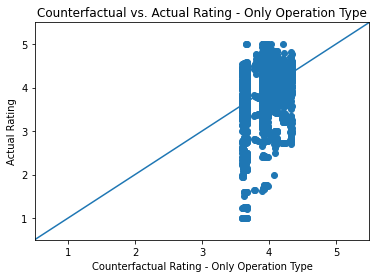

In [243]:
plt.scatter(df_2016["exante_rating_op"],df_2016["Rating"])
plt.xlabel("Counterfactual Rating - Only Operation Type")
plt.ylabel("Actual Rating")
plt.xlim([0.5,5.5])
plt.ylim([0.5,5.5])
plt.plot([0.5,5.5], [0.5,5.5])
plt.title("Counterfactual vs. Actual Rating - Only Operation Type")
plt.show()

# Get Ex-ante value - Chain Brand

In [244]:
OH = OneHotEncoder(handle_unknown='ignore')

fe_var= ["operation","Chain","operation_year","market_year_month"]

x_fe = OH.fit_transform(df_reviewed[fe_var]).toarray()
fe_var_cols = OH.fit(df_reviewed[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)
#.drop(["shareid_75909","year_month_2017-11-01"],axis=1)

y = df_reviewed["Rating"]
x = fe_var_df_1.astype(float)
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit(cov_type="cluster",cov_kwds={"groups":df_reviewed["shareid"]})
results.summary()

/Users/juju/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 725, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)
/Users/juju/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1838: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 3.816e-14
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               1.00
Time:                        00:51:11   Log-Likelihood:                -40282.
No. Observations:               49478   AIC:                         8.197e+04
Df Residuals:                   48773   BIC:                         8.818e+04
Df Model:                         704                                         
Covariance Type:              cluster                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                         -2.053e+11        nan        nan        nan         nan         nan
operation_Chain                                1.852e+11        nan        nan        nan         nan         nan
operation_Franchise                            4.938e+11        nan        nan        nan         nan         nan
operation_Independent                          3.066e+11   2.06e+18   1.49e-07      1.000   -4.04e+18    4.04e+18
Chain_0.0                                      6.431e+10   4.09e+17   1.57e-07      1.000   -8.01e+17    8.01e+17
Chain_593.0                                    6.431e+10    3.7e+17   1.74e-07      1.000   -7.25e+17    7.25e+17
Chain_607.0                                    6.431e+10   3.29e+17   1.95e-07      1.000   -6.45e+17    6.45e+17
Chain_639.0                                    6.431e+10   4.41e+17   1.46e-07      1.000   -8.65e+17    8.65e+17
Chain_677.0                                    6.431e+10    4.4e+17   1.46e-07      1.000   -8.63e+17    8.63e+17
Chain_817.0                                    6.431e+10    2.6e+17   2.47e-07      1.000    -5.1e+17     5.1e+17
Chain_823.0                                    6.431e+10   2.23e+17   2.88e-07      1.000   -4.38e+17    4.38e+17
Chain_830.0                                    6.431e+10   4.01e+17    1.6e-07      1.000   -7.87e+17    7.87e+17
Chain_839.0                                    6.431e+10   3.95e+17   1.63e-07      1.000   -7.74e+17    7.74e+17
Chain_842.0                                    6.431e+10   3.39e+17    1.9e-07      1.000   -6.65e+17    6.65e+17
Chain_846.0                                    6.431e+10   4.16e+17   1.54e-07      1.000   -8.16e+17    8.16e+17
Chain_868.0                                    6.431e+10   4.45e+17   1.45e-07      1.000   -8.71e+17    8.71e+17
Chain_871.0                                    6.431e+10        nan        nan        nan         nan         nan
Chain_887.0                                    6.431e+10   2.13e+17   3.01e-07      1.000   -4.18e+17    4.18e+17
Chain_892.0                                    6.431e+10   3.98e+17   1.62e-07      1.000    -7.8e+17     7.8e+17
Chain_893.0                                    6.431e+10   4.37e+17   1.47e-07      1.000   -8.56e+17    8.56e+17
Chain_895.0                                    6.431e+10   1.82e+17   3.53e-07      1.000   -3.57e+17    3.57e+17
Chain_911.0                                    6.431e+10        nan        nan        nan         nan         nan
Chain_918.0                                    6.431e+10   3.92e+17   1.64e-07      1.000   -7.68e+17    7.68e+17
Chain_919.0                                    6.431e+10   2.97e+17   2.16e-07      1.000   -5.83e+17    5.83e+17
Chain

In [245]:
df_reviewed

,level_0,post_month,shareid,year_month,Supply,Demand,Revenue,Occ,ADR,RevPAR,...,const_demand_param,hotel_fixed_effect_id,market_time_fixed_effect_id,hotel_fixed_effect_demand,market_time_fixed_effect_demand,is_national_chain,national_chain,operation,operation_year,exante_rating_op
0,0,2016-08,75909,2016-08-01,2170.0,1464.0,209160.00,67.4654,142.868852,96.387097,...,-1.822087,shareid_75909,"market_year_month_2016-08-01Miami/Hialeah, FL",-1.200499,0.418484,True,1031.0,Independent,Independent_2016,4.121033
1,1,2016-09,75909,2016-09-01,2100.0,700.0,75000.00,33.3333,107.142857,35.714286,...,-1.822087,shareid_75909,"market_year_month_2016-09-01Miami/Hialeah, FL",-1.200499,-0.198211,True,1031.0,Independent,Independent_2016,4.086060
2,2,2016-10,75909,2016-10-01,2170.0,1123.0,123965.00,51.7511,110.387355,57.126728,...,-1.822087,shareid_75909,"market_year_month_2016-10-01Miami/Hialeah, FL",-1.200499,0.196429,True,1031.0,Independent,Independent_2016,4.096123
3,3,2016-11,75909,2016-11-01,1956.0,1282.0,201327.00,65.5419,157.041342,102.927914,...,-1.822087,shareid_75909,"market_year_month_2016-11-01Miami/Hialeah, FL",-1.200499,0.862825,True,1031.0,Independent,Independent_2016,4.115303
4,4,2016-12,75909,2016-12-01,2003.0,1020.0,199453.00,50.9236,195.542157,99.577134,...,-1.822087,shareid_75909,"market_year_month_2016-12-01Miami/Hialeah, FL",-1.200499,2.222365,True,1031.0,Independent,Independent_2016,4.111153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49473,73113,2017-06,10127842,2017-06-01,750.0,646.0,50120.06,86.1333,77.585232,66.826747,...,-1.822087,shareid_10127842,"market_year_month_2017-06-01Chicago, IL",-3.018129,2.855224,False,0.0,Franchise,Franchise_2017,4.289047
49474,73114,2017-07,10127842,2017-07-01,775.0,594.0,46284.81,76.6451,77.920556,59.722335,...,-1.822087,shareid_10127842,"market_year_month_2017-07-01Chicago, IL",-3.018129,1.712459,False,0.0,Franchise,Franchise_2017,4.297195
49475,73115,2017-08,10127842,2017-08-01,775.0,548.0,44053.29,70.7096,80.389215,56.842955,...,-1.822087,shareid_10127842,"market_year_month_2017-08-01Chicago, IL",-3.018129,1.629424,False,0.0,Franchise,Franchise_2017,4.293755
49476,73116,2017-09,10127842,2017-09-01,750.0,558.0,43968.37,74.4000,78.796362,58.624493,...,-1.822087,shareid_10127842,"market_year_month_2017-09-01Chicago, IL",-3.018129,1.916085,False,0.0,Franchise,Franchise_2017,4.292969


In [246]:
df_reviewed["exante_rating_op_chain"] = results.fittedvalues
df = df.merge(df_reviewed[["shareid","month","year","exante_rating_op_chain"]],\
             on=["shareid","month","year"], how="left")

df["exante_rating_op_chain"] = df["exante_rating_op_chain"].fillna(0)
df_2016 = df[df["year"]==2016].reset_index().drop(["index","level_0"],axis=1)

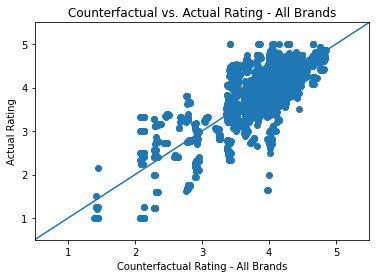

In [247]:
plt.scatter(df_2016["exante_rating_op_chain"],df_2016["Rating"])
plt.xlabel("Counterfactual Rating - All Brands")
plt.ylabel("Actual Rating")
plt.xlim([0.5,5.5])
plt.ylim([0.5,5.5])
plt.plot([0.5,5.5], [0.5,5.5])
plt.title("Counterfactual vs. Actual Rating - All Brands")
plt.show()

# Get Ex-ante value - National Chain Brand

In [248]:
OH = OneHotEncoder(handle_unknown='ignore')

fe_var= ["operation","national_chain","operation_year","market_year_month"]

x_fe = OH.fit_transform(df_reviewed[fe_var]).toarray()
fe_var_cols = OH.fit(df_reviewed[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)
#.drop(["shareid_75909","year_month_2017-11-01"],axis=1)

y = df_reviewed["Rating"]
x = fe_var_df_1.astype(float)
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit(cov_type="cluster",cov_kwds={"groups":df_reviewed["shareid"]})
results.summary()

/Users/juju/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 636, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)
/Users/juju/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1838: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                 6.355e-15
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               1.00
Time:                        00:51:18   Log-Likelihood:                -51257.
No. Observations:               49478   AIC:                         1.037e+05
Df Residuals:                   48862   BIC:                         1.092e+05
Df Model:                         615                                         
Covariance Type:              cluster                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                         -9.322e+10    1.5e+19   -6.2e-09      1.000   -2.95e+19    2.95e+19
operation_Chain                                2.828e+11   1.49e+19    1.9e-08      1.000   -2.92e+19    2.92e+19
operation_Franchise                            3.495e+11    1.2e+19   2.91e-08      1.000   -2.36e+19    2.36e+19
operation_Independent                          1.635e+11   1.69e+19   9.66e-09      1.000   -3.32e+19    3.32e+19
national_chain_0.0                            -7.896e+10   1.25e+18   -6.3e-08      1.000   -2.46e+18    2.46e+18
national_chain_817.0                          -7.896e+10   4.21e+17  -1.87e-07      1.000   -8.26e+17    8.26e+17
national_chain_839.0                          -7.896e+10   1.62e+18  -4.87e-08      1.000   -3.18e+18    3.18e+18
national_chain_842.0                          -7.896e+10    1.2e+18  -6.59e-08      1.000   -2.35e+18    2.35e+18
national_chain_868.0                          -7.896e+10   1.05e+18  -7.52e-08      1.000   -2.06e+18    2.06e+18
national_chain_924.0                          -7.896e+10   5.57e+17  -1.42e-07      1.000   -1.09e+18    1.09e+18
national_chain_926.0                          -7.896e+10    1.1e+18  -7.17e-08      1.000   -2.16e+18    2.16e+18
national_chain_933.0                          -7.896e+10   1.33e+18  -5.92e-08      1.000   -2.61e+18    2.61e+18
national_chain_1007.0                         -7.896e+10   5.56e+17  -1.42e-07      1.000   -1.09e+18    1.09e+18
national_chain_1030.0                         -7.896e+10   1.31e+18  -6.03e-08      1.000   -2.57e+18    2.57e+18
national_chain_1031.0                         -7.896e+10   2.55e+17  -3.09e-07      1.000      -5e+17       5e+17
national_chain_3098.0                         -7.896e+10   1.35e+18  -5.83e-08      1.000   -2.65e+18    2.65e+18
operation_year_Chain_2002                      -9.62e+10   1.47e+18  -6.55e-08      1.000   -2.88e+18    2.88e+18
operation_year_Chain_2003                     -1.009e+11        nan        nan        nan         nan         nan
operation_year_Chain_2004                     -9.685e+10   1.95e+18  -4.96e-08      1.000   -3.82e+18    3.82e+18
operation_year_Chain_2005                     -1.131e+11   1.58e+18  -7.18e-08      1.000   -3.09e+18    3.09e+18
operation_year_Chain_2006                     -8.027e+10   1.35e+18  -5.93e-08      1.000   -2.65e+18    2.65e+18
operation_year_Chain_2007                     -7.143e+10   1.44e+18  -4.97e-08      1.000   -2.82e+18    2.82e+18
operation_year_Chain_2008                     -1.248e+11    1.2e+18  -1.04e-07      1.000   -2.34e+18    2.34e+18
operation_year_Chain_2009                      2.715e+10   7.73e+17   3.51e-08      1.000   -1.52e+18    1.52e+18
opera

In [249]:
df_reviewed["exante_rating_op_chain_national"] = results.fittedvalues
df = df.merge(df_reviewed[["shareid","month","year","exante_rating_op_chain_national"]],\
             on=["shareid","month","year"], how="left")

df["exante_rating_op_chain_national"] = df["exante_rating_op_chain_national"].fillna(0)
df_2016 = df[df["year"]==2016].reset_index().drop(["index","level_0"],axis=1)

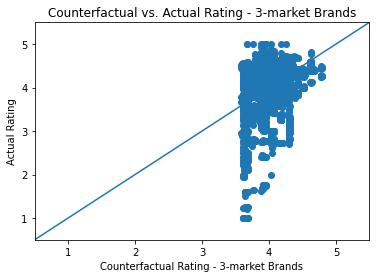

In [250]:
plt.scatter(df_2016["exante_rating_op_chain_national"],df_2016["Rating"])
plt.xlabel("Counterfactual Rating - 3-market Brands")
plt.ylabel("Actual Rating")
plt.xlim([0.5,5.5])
plt.ylim([0.5,5.5])
plt.plot([0.5,5.5], [0.5,5.5])
plt.title("Counterfactual vs. Actual Rating - 3-market Brands")
plt.show()

In [251]:
output_dir = r"/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project/data"

df.to_csv(os.path.join(output_dir,r"welfare_data_with_exante_ratings_ch3.csv"), index=False)

# Get Ex-ante value - Fixed Effect
Regress rating on hotel characteristics

In [10]:
OH = OneHotEncoder(handle_unknown='ignore')

fe_var= ["shareid","market_year_month"]

x_fe = OH.fit_transform(df_reviewed[fe_var]).toarray()
fe_var_cols = OH.fit(df_reviewed[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)
#.drop(["shareid_75909","year_month_2017-11-01"],axis=1)

y = df_reviewed["Rating"]
x = fe_var_df_1.astype(float)
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit(cov_type="cluster",cov_kwds={"groups":df_reviewed["shareid"]})
results.summary()

/Users/juju/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1008, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/Users/juju/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1838: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                -3.286e-10
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               1.00
Time:                        01:22:24   Log-Likelihood:                -21445.
No. Observations:               44339   AIC:                         4.490e+04
Df Residuals:                   43334   BIC:                         5.364e+04
Df Model:                        1004                                         
Covariance Type:              cluster                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                         -7.733e+09        nan        nan        nan         nan         nan
shareid_75909                                  1.301e+10        nan        nan        nan         nan         nan
shareid_80022                                 -2.864e+10        nan        nan        nan         nan         nan
shareid_80596                                 -2.864e+10   2.11e+16  -1.36e-06      1.000   -4.13e+16    4.13e+16
shareid_80713                                  1.301e+10        nan        nan        nan         nan         nan
shareid_81037                                  1.301e+10        nan        nan        nan         nan         nan
shareid_81154                                 -2.864e+10   9.35e+15  -3.06e-06      1.000   -1.83e+16    1.83e+16
shareid_81425                                  1.301e+10        nan        nan        nan         nan         nan
shareid_81685                                  1.301e+10        nan        nan        nan         nan         nan
shareid_81769                                 -2.864e+10   1.34e+16  -2.15e-06      1.000   -2.62e+16    2.62e+16
shareid_82026                                 -2.864e+10   1.48e+16  -1.93e-06      1.000    -2.9e+16     2.9e+16
shareid_82381                                 -2.864e+10        nan        nan        nan         nan         nan
shareid_82442                                  1.301e+10   2.22e+16   5.87e-07      1.000   -4.34e+16    4.34e+16
shareid_82557                                  1.301e+10   1.64e+16   7.95e-07      1.000   -3.21e+16    3.21e+16
shareid_82658                                 -2.864e+10        nan        nan        nan         nan         nan
shareid_83062                                  1.769e+10   1.09e+16   1.63e-06      1.000   -2.13e+16    2.13e+16
shareid_83265                                 -2.864e+10        nan        nan        nan         nan         nan
shareid_83582                                 -2.864e+10        nan        nan        nan         nan         nan
shareid_83784                                  1.769e+10   1.77e+16   9.99e-07      1.000   -3.47e+16    3.47e+16
shareid_84076                                 -2.864e+10   8.06e+15  -3.56e-06      1.000   -1.58e+16    1.58e+16
shareid_84172                                  1.301e+10   2.83e+16    4.6e-07      1.000   -5.55e+16    5.55e+16
shareid_84259                                  1.301e+10        nan        nan        nan         nan         nan
shareid_84581                                  1.769e+10   2.21e+16      8e-07      1.000   -4.33e+16    4.33e+16
shareid_84600                                  1.301e+10   6.86e+15    1.9e-06      1.000   -1.34e+16    1.34e+16
share

In [11]:
df_reviewed["exante_rating_baseline"] = results.fittedvalues
#df_reviewed["exante_rating"] = 5*(df_reviewed["exante_rating_fit"]-df_reviewed["exante_rating_fit"].min())/\
#(df_reviewed["exante_rating_fit"].max()-df_reviewed["exante_rating_fit"].min())

In [12]:
#df_2016["exante_rating_baseline"] = df_2016["exante_rating_baseline"]*df_2016["is_reviewed"]

In [13]:
df = df.merge(df_reviewed[["shareid","month","year","exante_rating_baseline"]],\
             on=["shareid","month","year"], how="left")

In [14]:
df["exante_rating_baseline"] = df["exante_rating_baseline"].fillna(0)


In [15]:
df_2016 = df[df["year"]==2016].reset_index().drop(["index","level_0"],axis=1)

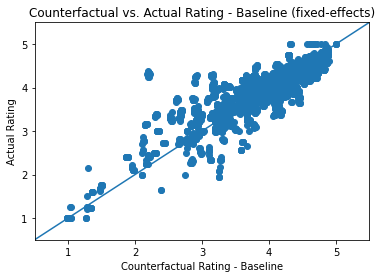

In [16]:
plt.scatter(df_2016["exante_rating_baseline"],df_2016["Rating"])
plt.xlabel("Counterfactual Rating - Baseline")
plt.ylabel("Actual Rating")
plt.xlim([0.5,5.5])
plt.ylim([0.5,5.5])
plt.plot([0.5,5.5], [0.5,5.5])
plt.title("Counterfactual vs. Actual Rating - Baseline (fixed-effects)")
plt.show()

# Get Ex-ante value - random

In [453]:
df_reviewed["Rating"].describe()

count    49478.000000
mean         3.808161
std          0.735986
min          1.000000
25%          3.500000
50%          3.964706
75%          4.312500
max          5.000000
Name: Rating, dtype: float64

In [454]:
# generate random error to review ratings
random.seed(10)
df_reviewed["exante_rating_random"] = np.random.uniform(1, 5, len(df_reviewed))


In [455]:
df = df.merge(df_reviewed[["shareid","month","year","exante_rating_random"]],\
             on=["shareid","month","year"], how="left")


In [456]:
df["exante_rating_random"] = df["exante_rating_random"].fillna(0)

In [457]:
df_2016 = df[df["year"]==2016].reset_index().drop(["index","level_0"],axis=1)

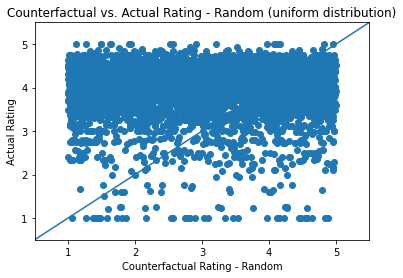

In [458]:
plt.scatter(df_2016["exante_rating_random"],df_2016["Rating"])
plt.xlabel("Counterfactual Rating - Random")
plt.ylabel("Actual Rating")
plt.xlim([0.5,5.5])
plt.ylim([0.5,5.5])
plt.plot([0.5,5.5], [0.5,5.5])
plt.title("Counterfactual vs. Actual Rating - Random (uniform distribution)")
plt.show()

In [459]:
# Get R squared

OH = OneHotEncoder(handle_unknown='ignore')

fe_var= fe_var= ["market_year_month"]

x_fe = OH.fit_transform(df_reviewed[fe_var]).toarray()
fe_var_cols = OH.fit(df_reviewed[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)

con_var_list = ["exante_rating_random"]
con_var_df = df_reviewed[con_var_list]
x = pd.concat([con_var_df,fe_var_df_1], axis=1).astype(float)
x = sm.add_constant(x)

y = df_reviewed["Rating"]

model = sm.OLS(y, x)
results = model.fit(cov_type="cluster",cov_kwds={"groups":df_reviewed["shareid"]})
results.summary()

/Users/juju/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 574, but rank is 376
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     325.6
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:26:40   Log-Likelihood:                -52449.
No. Observations:               49478   AIC:                         1.060e+05
Df Residuals:                   48904   BIC:                         1.111e+05
Df Model:                         573                                         
Covariance Type:              cluster                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             3.7599      0.049     76.838      0.000       3.664       3.856
exante_rating_random                             -0.0073      0.003     -2.688      0.007      -0.013      -0.002
market_year_month_2002-01-01Chicago, IL           1.2542      0.048     26.124      0.000       1.160       1.348
market_year_month_2002-01-01Miami/Hialeah, FL     1.2490      0.048     25.865      0.000       1.154       1.344
market_year_month_2002-02-01Chicago, IL          -0.7476      1.417     -0.528      0.598      -3.524       2.029
market_year_month_2002-02-01Miami/Hialeah, FL     0.0953      0.152      0.628      0.530      -0.202       0.393
market_year_month_2002-03-01Chicago, IL          -1.0752      0.981     -1.096      0.273      -2.998       0.847
market_year_month_2002-03-01Miami/Hialeah, FL    -0.6596      0.401     -1.646      0.100      -1.445       0.126
market_year_month_2002-04-01Chicago, IL          -1.4915      0.815     -1.831      0.067      -3.088       0.105
market_year_month_2002-04-01Houston, TX          -2.7312      0.048    -57.328      0.000      -2.825      -2.638
market_year_month_2002-04-01Miami/Hialeah, FL    -0.6628      0.400     -1.656      0.098      -1.447       0.122
market_year_month_2002-05-01Chicago, IL          -0.7339      0.700     -1.048      0.295      -2.106       0.638
market_year_month_2002-05-01Houston, TX          -1.2388      1.062     -1.166      0.243      -3.321       0.843
market_year_month_2002-05-01Miami/Hialeah, FL    -0.5732      0.578     -0.992      0.321      -1.705       0.559
market_year_month_2002-06-01Chicago, IL          -0.3449      0.546     -0.631      0.528      -1.416       0.726
market_year_month_2002-06-01Houston, TX          -1.2352      1.057     -1.168      0.243      -3.307       0.837
market_year_month_2002-06-01Miami/Hialeah, FL    -0.5652      0.576     -0.982      0.326      -1.693       0.563
market_year_month_2002-07-01Chicago, IL          -0.2407      0.450     -0.535      0.593      -1.123       0.642
market_year_month_2002-07-01Houston, TX          -1.2407      1.054     -1.177      0.239      -3.306       0.825
market_year_month_2002-07-01Miami/Hialeah, FL    -0.4695      0.652     -0.720      0.472      -1.748       0.809
market_year_month_2002-08-01Chicago, IL          -0.1672      0.401     -0.417      0.677      -0.954       0.620
market_year_month_2002-08-01Houston, TX          -1.2415      1.047     -1.185      0.236      -3.294       0.811
market_year_month_2002-08-01Miami/Hialeah, FL    -0.4787      0.648     -0.739      0.460      -1.749       0.791
market_year_month_2002-09-01Chicago, IL          -0.1151      0.355     -0.325      0.745      -0.810       0.580
marke

In [460]:
#df_reviewed = df[df["is_reviewed"]==True].reset_index()
#list(df_reviewed.columns)

In [17]:
OH = OneHotEncoder(handle_unknown='ignore')

fe_var= ["Chain","Owner","Mgmt",\
         "ParentCompany","Operation","Scale","Class",\
         "Location","market_year_month"]

x_fe = OH.fit_transform(df_reviewed[fe_var]).toarray()
fe_var_cols = OH.fit(df_reviewed[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)

con_var_list = ["OpenDate"]
con_var_df = df_reviewed[con_var_list]

x = pd.concat([con_var_df,fe_var_df_1], axis=1).astype(float)
x = sm.add_constant(x)

y = df_reviewed["Rating"]


model = sm.OLS(y, x)
results = model.fit(cov_type="cluster",cov_kwds={"groups":df_reviewed["shareid"]})
results.summary()

/Users/juju/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 876, but rank is 444
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                -7.115e+10
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               1.00
Time:                        01:23:37   Log-Likelihood:                -33546.
No. Observations:               44339   AIC:                         6.864e+04
Df Residuals:                   43567   BIC:                         7.535e+04
Df Model:                         771                                         
Covariance Type:              cluster                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -6.9565      1.758     -3.958      0.000     -10.401      -3.512
OpenDate                                          0.0088      0.002      4.959      0.000       0.005       0.012
Chain_0.0                                         0.1420      0.095      1.495      0.135      -0.044       0.328
Chain_593.0                                       0.1087      0.159      0.684      0.494      -0.203       0.420
Chain_607.0                                      -0.0817      0.053     -1.539      0.124      -0.186       0.022
Chain_639.0                                      -0.1146      0.047     -2.437      0.015      -0.207      -0.022
Chain_677.0                                      -0.1550      0.052     -2.986      0.003      -0.257      -0.053
Chain_817.0                                       0.0335      0.139      0.241      0.810      -0.239       0.306
Chain_823.0                                      -0.1087      0.049     -2.238      0.025      -0.204      -0.014
Chain_830.0                                      -0.0337      0.096     -0.349      0.727      -0.223       0.155
Chain_839.0                                       0.1089      0.165      0.661      0.509      -0.214       0.432
Chain_842.0                                      -0.1941      0.129     -1.503      0.133      -0.447       0.059
Chain_846.0                                      -0.2310      0.325     -0.710      0.478      -0.869       0.407
Chain_868.0                                      -0.2199      0.150     -1.470      0.142      -0.513       0.073
Chain_871.0                                      -0.5849      0.244     -2.394      0.017      -1.064      -0.106
Chain_887.0                                       0.4656      0.088      5.299      0.000       0.293       0.638
Chain_892.0                                      -0.4606      0.150     -3.071      0.002      -0.755      -0.167
Chain_893.0                                       0.1179      0.157      0.752      0.452      -0.189       0.425
Chain_895.0                                      -1.5847      0.210     -7.557      0.000      -1.996      -1.174
Chain_911.0                                      -0.8875      0.073    -12.090      0.000      -1.031      -0.744
Chain_918.0                                      -0.3301      0.100     -3.307      0.001      -0.526      -0.134
Chain_919.0                                      -0.3165      0.133     -2.386      0.017      -0.576      -0.057
Chain_920.0                                      -0.3834      0.211     -1.816      0.069      -0.797       0.030
Chain_924.0                                       0.4086      0.251      1.628      0.104      -0.083       0.901
Chain

In [18]:
df_reviewed["exante_rating_obs"] = results.fittedvalues



In [19]:
df = df.merge(df_reviewed[["shareid","month","year","exante_rating_obs"]],\
             on=["shareid","month","year"], how="left")

df["exante_rating_obs"] = df["exante_rating_obs"].fillna(0)


In [20]:
df_2016 = df[df["year"]==2016].reset_index().drop(["index","level_0"],axis=1)

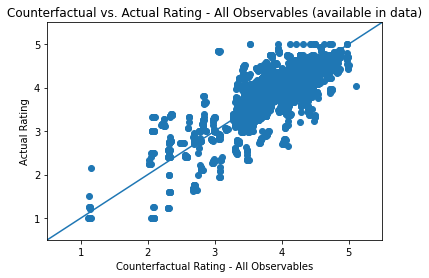

In [21]:
plt.scatter(df_2016["exante_rating_obs"],df_2016["Rating"])
plt.xlabel("Counterfactual Rating - All Observables")
plt.ylabel("Actual Rating")
plt.xlim([0.5,5.5])
plt.ylim([0.5,5.5])
plt.plot([0.5,5.5], [0.5,5.5])
plt.title("Counterfactual vs. Actual Rating - All Observables (available in data)")
plt.show()

# Get Ex-ante value - Less Observed characteristics 

In [22]:
OH = OneHotEncoder(handle_unknown='ignore')

fe_var= [
        "Operation","Scale","Class",\
         "Location","market_year_month"]

x_fe = OH.fit_transform(df_reviewed[fe_var]).toarray()
fe_var_cols = OH.fit(df_reviewed[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)

con_var_list = ["OpenDate"]
con_var_df = df_reviewed[con_var_list]
x = pd.concat([con_var_df,fe_var_df_1], axis=1).astype(float)
x = sm.add_constant(x)

#x = fe_var_df_1.astype(float)
#x = sm.add_constant(x)

y = df_reviewed["Rating"]


model = sm.OLS(y, x)
results = model.fit(cov_type="cluster",cov_kwds={"groups":df_reviewed["shareid"]})
results.summary()

/Users/juju/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 558, but rank is 368
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     131.6
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:24:20   Log-Likelihood:                -41465.
No. Observations:               44339   AIC:                         8.403e+04
Df Residuals:                   43787   BIC:                         8.884e+04
Df Model:                         551                                         
Covariance Type:              cluster                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.9653      1.159     -5.146      0.000      -8.237      -3.694
OpenDate                                          0.0076      0.001      6.775      0.000       0.005       0.010
Operation_1                                      -2.3122      0.434     -5.322      0.000      -3.164      -1.461
Operation_2                                      -2.2015      0.443     -4.970      0.000      -3.070      -1.333
Operation_3                                      -1.4517      0.287     -5.061      0.000      -2.014      -0.889
Scale_1                                          -0.5701      0.182     -3.126      0.002      -0.928      -0.213
Scale_2                                          -0.8081      0.165     -4.893      0.000      -1.132      -0.484
Scale_3                                          -0.3542      0.187     -1.898      0.058      -0.720       0.012
Scale_4                                          -0.9735      0.215     -4.521      0.000      -1.396      -0.551
Scale_5                                          -1.3332      0.237     -5.630      0.000      -1.797      -0.869
Scale_6                                          -0.4745      0.266     -1.783      0.075      -0.996       0.047
Scale_7                                          -1.4517      0.287     -5.061      0.000      -2.014      -0.889
Class_1                                          -0.6726      0.214     -3.137      0.002      -1.093      -0.252
Class_2                                          -0.7238      0.233     -3.100      0.002      -1.181      -0.266
Class_3                                          -1.2082      0.222     -5.450      0.000      -1.643      -0.774
Class_4                                          -0.7374      0.204     -3.621      0.000      -1.136      -0.338
Class_5                                          -0.5630      0.220     -2.560      0.010      -0.994      -0.132
Class_6                                          -2.0604      0.310     -6.639      0.000      -2.669      -1.452
Location_1                                       -1.3705      0.293     -4.683      0.000      -1.944      -0.797
Location_2                                       -1.3979      0.299     -4.674      0.000      -1.984      -0.812
Location_3                                       -1.5024      0.290     -5.176      0.000      -2.071      -0.933
Location_5                                       -1.6945      0.315     -5.388      0.000      -2.311      -1.078
market_year_month_2002-01-01Chicago, IL           1.6300      0.097     16.836      0.000       1.440       1.820
market_year_month_2002-01-01Miami/Hialeah, FL     1.1176      0.075     14.864      0.000       0.970       1.265
marke

In [23]:
df_reviewed["exante_rating_obs_less"] = results.fittedvalues

df = df.merge(df_reviewed[["shareid","month","year","exante_rating_obs_less"]],\
             on=["shareid","month","year"], how="left")

df["exante_rating_obs_less"] = df["exante_rating_obs_less"].fillna(0)

In [24]:
df_2016 = df[df["year"]==2016].reset_index().drop(["index","level_0"],axis=1)

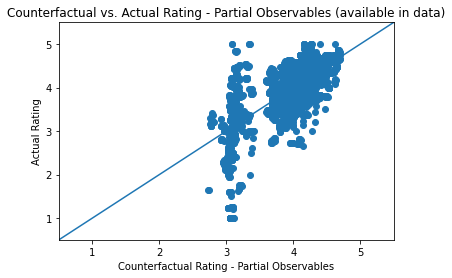

In [26]:
plt.scatter(df_2016["exante_rating_obs_less"],df_2016["Rating"])
plt.xlabel("Counterfactual Rating - Partial Observables")
plt.ylabel("Actual Rating")
plt.xlim([0.5,5.5])
plt.ylim([0.5,5.5])
plt.plot([0.5,5.5], [0.5,5.5])
plt.title("Counterfactual vs. Actual Rating - Partial Observables (available in data)")
plt.show()

# Get Ex-ante value - Constant

In [470]:
#df_reviewed = df[df["is_reviewed"]==True].reset_index()

df_reviewed["exante_rating_const"] = df_reviewed["Rating"].mean()

In [471]:
df_reviewed["Rating"].mean()

3.8081609148813502

In [472]:
OH = OneHotEncoder(handle_unknown='ignore')

fe_var= ["market_year_month"]

x_fe = OH.fit_transform(df_reviewed[fe_var]).toarray()
fe_var_cols = OH.fit(df_reviewed[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)

con_var_list = ["exante_rating_const"]
con_var_df = df_reviewed[con_var_list]
x = pd.concat([con_var_df,fe_var_df_1], axis=1).astype(float)
x = sm.add_constant(x)

y = df_reviewed["Rating"]


model = sm.OLS(y, x)
results = model.fit(cov_type="cluster",cov_kwds={"groups":df_reviewed["shareid"]})
results.summary()

/Users/juju/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 573, but rank is 375
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                -1.220e+11
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               1.00
Time:                        12:27:03   Log-Likelihood:                -52452.
No. Observations:               49478   AIC:                         1.061e+05
Df Residuals:                   48905   BIC:                         1.111e+05
Df Model:                         572                                         
Covariance Type:              cluster                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
exante_rating_const                               0.9832      0.013     78.311      0.000       0.959       1.008
market_year_month_2002-01-01Chicago, IL           1.2557      0.048     26.263      0.000       1.162       1.349
market_year_month_2002-01-01Miami/Hialeah, FL     1.2557      0.048     26.263      0.000       1.162       1.349
market_year_month_2002-02-01Chicago, IL          -0.7443      1.416     -0.526      0.599      -3.520       2.031
market_year_month_2002-02-01Miami/Hialeah, FL     0.0890      0.142      0.626      0.531      -0.190       0.368
market_year_month_2002-03-01Chicago, IL          -1.0776      0.979     -1.101      0.271      -2.997       0.842
market_year_month_2002-03-01Miami/Hialeah, FL    -0.6610      0.402     -1.646      0.100      -1.448       0.126
market_year_month_2002-04-01Chicago, IL          -1.4943      0.816     -1.832      0.067      -3.093       0.104
market_year_month_2002-04-01Houston, TX          -2.7443      0.048    -57.396      0.000      -2.838      -2.651
market_year_month_2002-04-01Miami/Hialeah, FL    -0.6610      0.402     -1.646      0.100      -1.448       0.126
market_year_month_2002-05-01Chicago, IL          -0.7443      0.699     -1.064      0.287      -2.115       0.626
market_year_month_2002-05-01Houston, TX          -1.2443      1.053     -1.182      0.237      -3.307       0.819
market_year_month_2002-05-01Miami/Hialeah, FL    -0.5776      0.579     -0.998      0.318      -1.712       0.557
market_year_month_2002-06-01Chicago, IL          -0.3554      0.547     -0.650      0.515      -1.427       0.716
market_year_month_2002-06-01Houston, TX          -1.2443      1.053     -1.182      0.237      -3.307       0.819
market_year_month_2002-06-01Miami/Hialeah, FL    -0.5776      0.579     -0.998      0.318      -1.712       0.557
market_year_month_2002-07-01Chicago, IL          -0.2443      0.451     -0.541      0.588      -1.129       0.640
market_year_month_2002-07-01Houston, TX          -1.2443      1.053     -1.182      0.237      -3.307       0.819
market_year_month_2002-07-01Miami/Hialeah, FL    -0.4776      0.650     -0.735      0.462      -1.751       0.796
market_year_month_2002-08-01Chicago, IL          -0.1674      0.401     -0.418      0.676      -0.953       0.618
market_year_month_2002-08-01Houston, TX          -1.2443      1.053     -1.182      0.237      -3.307       0.819
market_year_month_2002-08-01Miami/Hialeah, FL    -0.4776      0.650     -0.735      0.462      -1.751       0.796
market_year_month_2002-09-01Chicago, IL          -0.1193      0.354     -0.337      0.736      -0.814       0.575
market_year_month_2002-09-01Houston, TX          -0.7443      0.807     -0.923      0.356      -2.325       0.837
marke

In [473]:
df = df.merge(df_reviewed[["shareid","year","month","exante_rating_const"]],\
             on=["shareid","year","month"], how="left")

In [474]:
df["exante_rating_const"]=df["exante_rating_const"].fillna(0)

In [475]:
df_2016 = df[df["year"]==2016].reset_index().drop(["index","level_0"],axis=1)

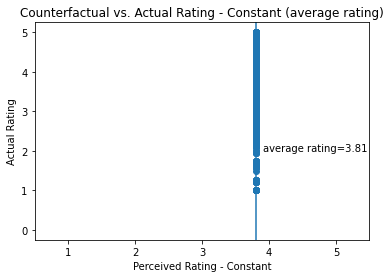

In [476]:
plt.scatter(df_2016["exante_rating_const"],df_2016["Rating"])
plt.xlabel("Perceived Rating - Constant")
plt.ylabel("Actual Rating")
plt.xlim([0.5,5.5])
plt.axvline(x=df["exante_rating_const"].iloc[0])
plt.text(df["exante_rating_const"].iloc[0]+0.1,2,'average rating={}'.format(round(df["exante_rating_const"].iloc[0],2)),rotation=0)
plt.title("Counterfactual vs. Actual Rating - Constant (average rating)")
plt.show()

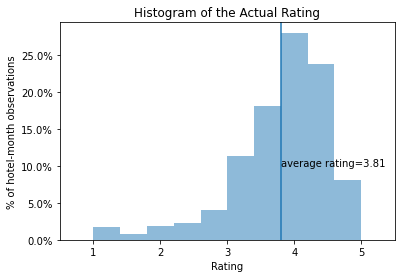

In [477]:
from matplotlib.ticker import PercentFormatter




plt.hist(df_reviewed["Rating"],weights=np.ones(len(df_reviewed)) / len(df_reviewed), alpha = 0.5)
plt.xlabel("Rating")
plt.ylabel("% of hotel-month observations")
plt.xlim([0.5,5.5])
plt.axvline(x=df_reviewed["exante_rating_const"].iloc[0])
plt.title("Histogram of the Actual Rating")
plt.text(df["exante_rating_const"].iloc[0],0.1,'average rating={}'.format(round(df["exante_rating_const"].iloc[0],2)),rotation=0)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [478]:
df.shape

(73118, 133)

In [479]:
output_dir = r"/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project/data"

df.to_csv(os.path.join(output_dir,r"welfare_data_with_exante_ratings_update.csv"), index=False)

In [118]:
df[df["is_reviewed"]==True]["exante_rating_random"].mean()

3.017294073649618

In [188]:
df[df["is_reviewed"]==True]["exante_rating_const"].mean()

3.8081609148843145

In [120]:
df[df["is_reviewed"]==True]["exante_rating_obs"].mean()

3.808160914881355

In [121]:
df[df["is_reviewed"]==True]["exante_rating_baseline"].mean()

3.8098804123539747

In [370]:
len(df_reviewed[(df_reviewed["Rating"]>=3.31)&(df_reviewed["Rating"]<=4.31)])/len(df_reviewed)

0.5590767613889002

In [371]:
df["capacity"]

KeyError: 'capacity'